# Decision Tree Learning: College Admission

A decision tree a learned set of rules that allows us to make decisions on data.

## Step 1: Load the Data

In [ ]:
import os
import urllib.request

data_location = "../data/college-admissions/admission-data.csv"
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/college-admissions/admission-data.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)


data_location: admission-data.csv


In [ ]:
import pandas as pd

dataset = pd.read_csv(data_location)
dataset

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,0,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
95,0,660,3.33,2
96,0,640,3.52,4
97,0,480,3.57,2
98,0,700,2.88,2


## Step 2 : Basic Analysis

### 2.1 Look at data split by 'admit' colunm
Looks like a resaonble distribution

In [ ]:
## TODO : group by 'admit' column
dataset.groupby('admit').size()

admit
0    57
1    43
dtype: int64

### 2.2 Summary of data
use 'describe' function

In [ ]:
## TODO : use 'describe'
dataset.describe()

,admit,gre,gpa,rank
count,100.00000,100.000000,100.000000,100.000000
mean,0.43000,600.000000,3.390700,2.520000
std,0.49757,124.462481,0.397188,1.019804
min,0.00000,300.000000,2.420000,1.000000
25%,0.00000,520.000000,3.127500,2.000000
50%,0.00000,600.000000,3.350000,2.000000
75%,1.00000,700.000000,3.675000,3.000000
max,1.00000,800.000000,4.000000,4.000000


## Step 3: Build feature vectors

In [ ]:
## TODO : 
## input feature vector is  :  'gre', 'gpa', 'rank'
input_columns = ['gre', 'gpa', 'rank']
x = dataset[input_columns]

## TODO : label vector is 'admit'
y = dataset['admit']

print ('x : ', x.shape)
print ('y : ', y.shape)

x :  (100, 3)
y :  (100,)


## Step 4: Split Data into training and test.

We will split our the data up into training and test.  (You know the drill by now).

In [ ]:
## TODO: Use training / test split of 80%/20%

from sklearn.model_selection import train_test_split

#x_train,x_test,y_train, y_test = train_test_split(x,y,  test_size=0.2)
## to control train/test split set random_state to a number
x_train,x_test,y_train, y_test = train_test_split(x,y, random_state=12, test_size=0.3)

print ("x_train :" , x_train.shape )
print ("x_test :", x_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train : (70, 3)
x_test : (30, 3)
y_train : (70,)
y_test : (30,)


## Step 5: Decision Tree

In [ ]:
## TODO : Create a DecisionTree model 

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

## TODO : train on (x_train, y_train)
model = dt.fit(x_train, y_train)
model

DecisionTreeClassifier()

### Visualize the tree

Must have graphviz installed

```console
$ brew install graphviz #Mac
$ sudo apt-get install graphviz #ubuntu
```
Windows Users: https://graphviz.gitlab.io/download/


In [ ]:
from sklearn import tree
from six import StringIO
import pydot 

dot_data = StringIO() 
tree.export_graphviz(model, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_png('tree.png')

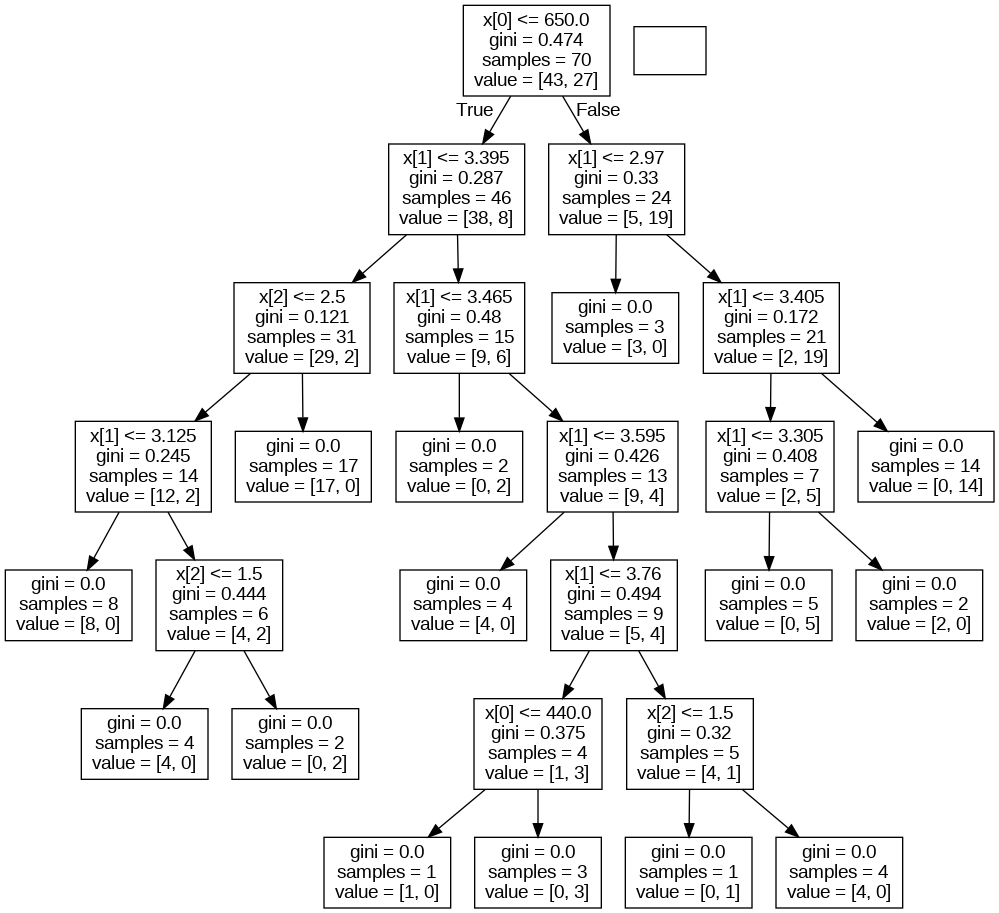

In [ ]:
# View the Image
from IPython.display import Image
Image("tree.png")

## Step 6 : Get Predictions on Test

In [ ]:
## TODO : Get predictions on test data
## Hint : 'test' set name
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1])

In [ ]:
import pandas as pd

a = pd.DataFrame({'label' : y_test, 'prediction': y_pred})
a

,label,prediction
17,0,0
41,1,1
92,1,1
14,1,1
68,0,1
31,1,0
89,1,1
15,0,1
21,1,1
60,1,1


## Step 7: Evaluate the model.

Let us check to see how the model did, using accuracy as a measure.

### 7.1 Model Accuracy

In [ ]:
train_accuracy = model.score(x_train,y_train)
## TODO : score with (x_test, y_test)
test_accuracy = model.score(x_test, y_test)

print ("Train accuracy: ", train_accuracy)
print ("Test accuracy: ", test_accuracy)

Train accuracy:  1.0
Test accuracy:  0.7333333333333333


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7333333333333333

### 7.2 Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9,  5],
       [ 3, 13]])

[]

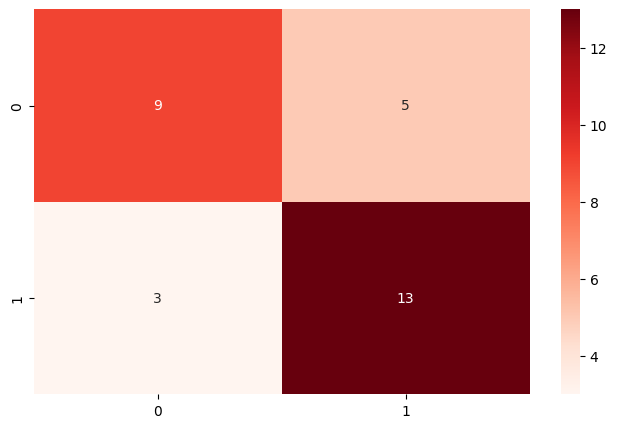

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d').plot()

## Step 8 Feature Importances

How important were our features?

check out model.feature_importances_

What can you conclude?



In [ ]:
model.feature_importances_

array([0.40810333, 0.45382511, 0.13807155])

In [ ]:
feature_importantance_df = pd.DataFrame({'feature' : input_columns, 'importantance' : model.feature_importances_})

feature_importantance_df.sort_values(['importantance'], ascending=False)

,feature,importantance
1,gpa,0.453825
0,gre,0.408103
2,rank,0.138072


## Step 9: Do a Few Runs
- Click 'Cell --> Run All'
- Observe how the 'accuracy' output changes above
- Why?  Can we get the same accuracy all the times?

To get 'consistant' split for testing and random data you can set the seed variable random_state
   
```python
x_train,x_test,y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

```

## Step-10: Hyper Parameter Tuning

Let's use crossvalidation to get the best parameters for the tree!



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

## Verbose levels
##   0 - none
##   1 - little
##   2 - more
grid_search = GridSearchCV(estimator=dt,
                           param_grid=grid_param,
                           cv=5,
                           n_jobs =-1,
                           verbose = 1)

In [ ]:
%%time

## Note: We are doing CV on entire data, not just training set
grid_search.fit(x,y)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
CPU times: user 16.2 s, sys: 441 ms, total: 16.6 s
Wall time: 2min 33s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

## Create the Best Tree

In [ ]:
# Find the best params
print ("best model", grid_search.best_estimator_)
print("best parameters", grid_search.best_params_)
print("best score: ", grid_search.best_score_)

best model DecisionTreeClassifier(max_depth=3, min_samples_split=9, splitter='random')
best parameters {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 9, 'splitter': 'random'}
best score:  0.8400000000000001


In [ ]:
#  Use the best params
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

dt = DecisionTreeClassifier(criterion = grid_search.best_params_['criterion'], 
                            max_depth = grid_search.best_params_['max_depth'],  
                            min_samples_leaf = grid_search.best_params_['min_samples_leaf'], 
                            min_samples_split = grid_search.best_params_['min_samples_split'], 
                            splitter = grid_search.best_params_['splitter'])

cv_results = cross_validate(estimator= dt, 
                            X=x, 
                            y=y, 
                            cv=10, 
                            scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                            return_train_score=True,
                            return_estimator=False,
                            n_jobs= -1)

# model = dt.fit(x_train, y_train)
# print ("Train accuracy: ", model.score(x_train,y_train))
# print ("Test accuracy: ", model.score(x_test, y_test))

In [ ]:
cv_results

{'fit_time': array([0.00554848, 0.01329184, 0.00324488, 0.0037744 , 0.00319457,
        0.00287604, 0.00370908, 0.00360847, 0.00318503, 0.00313616]),
 'score_time': array([0.02914143, 0.01480937, 0.01391935, 0.03744435, 0.01229835,
        0.0157423 , 0.03221893, 0.02390289, 0.0121007 , 0.02446985]),
 'test_accuracy': array([1. , 0.8, 0.8, 0.7, 0.6, 0.6, 0.7, 0.5, 0.8, 0.8]),
 'train_accuracy': array([0.77777778, 0.77777778, 0.72222222, 0.78888889, 0.83333333,
        0.83333333, 0.81111111, 0.73333333, 0.76666667, 0.8       ]),
 'test_precision': array([1.        , 0.75      , 0.75      , 0.66666667, 0.5       ,
        0.        , 1.        , 0.5       , 1.        , 0.71428571]),
 'train_precision': array([0.78787879, 0.91304348, 0.76923077, 0.91666667, 0.92857143,
        0.96153846, 0.95833333, 0.675     , 0.94736842, 0.83333333]),
 'test_recall': array([1.  , 0.75, 0.75, 0.5 , 0.5 , 0.  , 0.25, 0.2 , 0.6 , 1.  ]),
 'train_recall': array([0.66666667, 0.53846154, 0.51282051, 0.56410

In [ ]:
from numpy import mean
from scipy import stats

print ("accuracy range = ",  min(cv_results['test_accuracy']),  " to ", max(cv_results['test_accuracy']))
print ("average accuracy : ", mean(cv_results['test_accuracy']))
print ("trim 10% accuracy : ", stats.trim_mean(cv_results['test_accuracy'], 0.1))

accuracy range =  0.5  to  1.0
average accuracy :  0.7299999999999999
trim 10% accuracy :  0.725


[[52  5]
 [ 3 40]]


[]

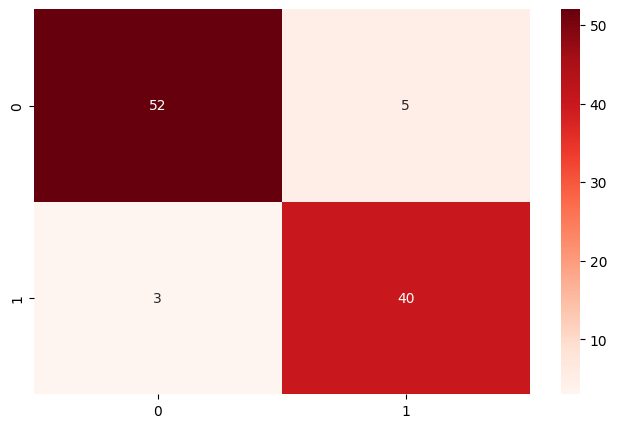

In [ ]:
from sklearn.metrics import confusion_matrix

# y_pred = model.predict(x_test)
# cm = confusion_matrix(y_test, y_pred)

y_pred = model.predict(x)
cm = confusion_matrix(y, y_pred)
print (cm)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d').plot()